# Phenotypic phase plane analysis
## iCW773

In [4]:
import numpy as np
from cobra.io import read_sbml_model

In [5]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [6]:
model = read_sbml_model('/Users/macintosh/Documents/Phyton/Project/iCW773_test7.xml')

No objective coefficients in model. Unclear what should be optimized


In [58]:
model.reactions.CG_biomass_cgl_ATCC13032 # Biomass model iCW773

Reaction identifier,CG_biomass_cgl_ATCC13032
Name,cgl biomass objective function (ATCC13032)
Memory address,0x12c0f0950
Stoichiometry,0.098705 arabino_c + 47.7 atp_c + 0.01039 dna_c + 47.7 h2o_c + 0.062224 ions_c + 0.10598 mycoli_c + 0.098705 peptid_c + 0.029092 phosph_c + 0.54028 protein_c + 0.05195 rna_c + 0.002679... 0.098705 arabino + 47.7 ATP + 0.01039 DNA + 47.7 H2O + 0.062224 ions + 0.10598 mycoli + 0.098705 peptid + 0.029092 phosph + 0.54028 protein + 0.05195 rna + 0.002679 soluble_pool --> 47.7 ADP +...
GPR,
Lower bound,0.0
Upper bound,0.428929662134894


In [59]:
model.medium # Medium model iCW773

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


{'EX_ca2_e': 0.0144877134286247,
 'EX_cobalt2_e': 7.00338234344926e-05,
 'EX_cu2_e': 0.00197271722237563,
 'EX_fe2_e': 0.16239125,
 'EX_fe3_e': 0.0217300637039616,
 'EX_glc_e': 4.67,
 'EX_k_e': 0.543285250115532,
 'EX_mg2_e': 0.0241459221505149,
 'EX_mn2_e': 0.00192443552016793,
 'EX_nh4_e': 11.9121416666662,
 'EX_ni2_e': 0.00089824250292982,
 'EX_o2_e': 16.5067783333334,
 'EX_pi_e': 0.918000000000888,
 'EX_so4_e': 4.01673156249995,
 'EX_zn2_e': 0.000948926279874219,
 'EX_BIOTIN': 1.01925397503027e-06,
 'EX_cl': 0.0144877134286247}

### Aerobic conditions

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
/Users/macintosh/anaconda3/lib/python3.11/site-packages/cobra/core/metabolite.py:146: UserWarning: 26.227799999999995 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  warn(f"{count} is not an integer (in formula {self.formula})")
/Users/macintosh/anaconda3/lib/python3.11/site-pa

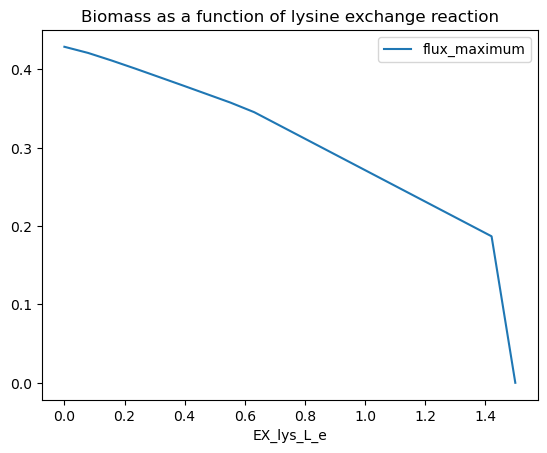

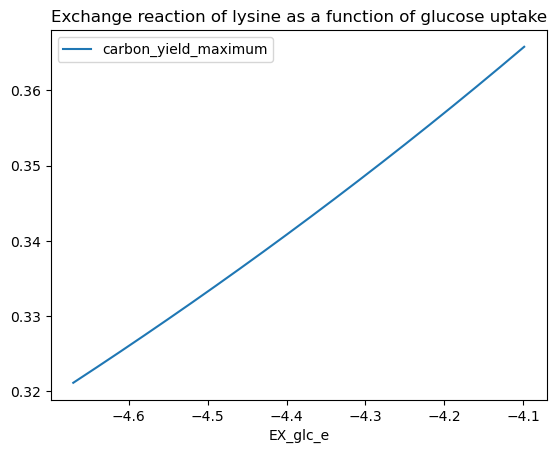

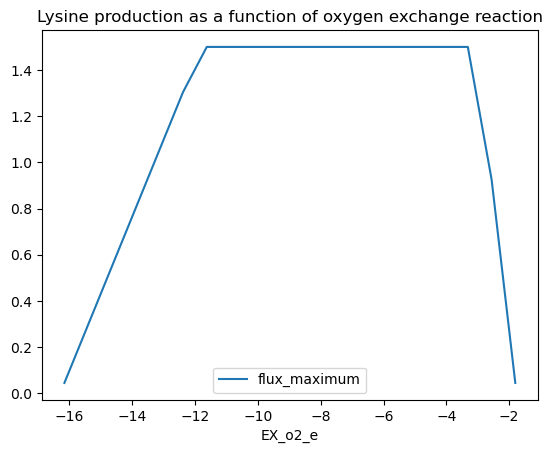

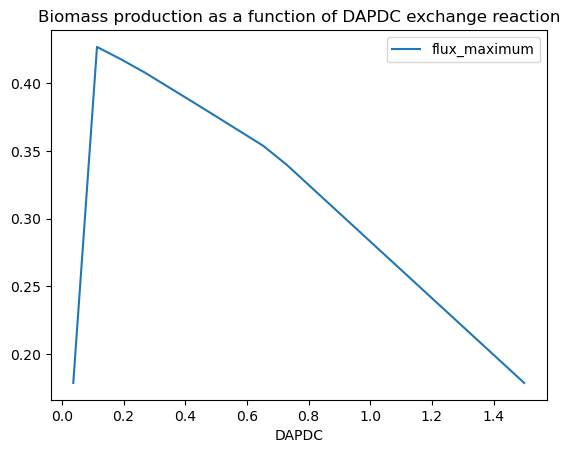

In [88]:
medium = model.medium
with model:
    model.medium = medium
    model.objective = model.reactions.EX_lys_L_e
    lys_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model,
                    reactions=[model.reactions.EX_lys_L_e],
                    objective=model.reactions.CG_biomass_cgl_ATCC13032)
    ppp_LYS = production_envelope(model,
                    reactions=[model.reactions.EX_glc_e],
                    objective=model.reactions.EX_lys_L_e)
    ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.EX_lys_L_e)
    
    ppp_BIOMASS.plot(x='EX_lys_L_e', y='flux_maximum', title = 'Biomass as a function of lysine exchange reaction' ) #carbon yield of biomass as function of glucose uptake
    ppp_LYS.plot(x='EX_glc_e', y='carbon_yield_maximum', title = 'Exchange reaction of lysine as a function of glucose uptake') #carbon yield of lysine as function of glucose uptake
    ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'Lysine production as a function of oxygen exchange reaction')
    pppDAPDC_CG.plot(x='DAPDC', y='flux_maximum', title = 'Biomass production as a function of DAPDC exchange reaction')

In the first figure we observe that there a correlation between biomass production and lysine production. The more carbon goes to lysine production, the less goes to biomass.

In the second figure we see that the more glucose is consumed, we have a larger production of lysine.

In the third figure we see that there is low lysine production when there is little oxygen. It produces a high flux in a range of oxygen, before falling again at higher level of oxygen.

In the fourth figure biomass starts to incresase while the production of DAPDC it's low. Then the carbon goes to DAPDC production, and the biomass decreases. 

### Anaerobic conditions

In [67]:
medium = model.medium
with model:
    medium['EX_o2_e'] = 0
    model.medium = medium
    model.objective = model.reactions.EX_lys_L_e
    lys_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model,
                    reactions=[model.reactions.EX_lys_L_e],
                    objective=model.reactions.CG_biomass_cgl_ATCC13032)
    ppp_LYS = production_envelope(model,
                    reactions=[model.reactions.EX_glc_e],
                    objective=model.reactions.EX_lys_L_e)
    ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.EX_lys_L_e)

    ppp_BIOMASS.plot(x='EX_lys_L_e', y='flux_maximum', title = 'Biomass as a function of lysine exchange reaction' ) #carbon yield of biomass as function of glucose uptake
    ppp_LYS.plot(x='EX_glc_e', y='carbon_yield_maximum', title = 'Exchange reaction of lysine as a function of glucose uptake') #carbon yield of lysine as function of glucose uptake
    ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'Lysine production as a function of oxygen exchange reaction')

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


ValueError: The lower bound must be less than or equal to the upper bound (0 <= -1.44076799999993).

No results, which fits the anaerobic conditions to produce lysine.

## iCGB21FR

In [68]:
model2 = read_sbml_model('/Users/macintosh/Documents/Phyton/Project/iCGB21FR.xml')

SBML package 'layout' not supported by cobrapy, information is not parsed
https://juser.fz-juelich.de/record/188973 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


In [69]:
model2.reactions.Growth # Biomass model iCGB21FR

Reaction identifier,Growth
Name,
Memory address,0x13369f890
Stoichiometry,0.000215957436615497 10fthf_c + 0.497466186805283 ala__L_c + 0.000215957436615497 amet_c + 0.0062974490405647 amp_c + 0.286450592337987 arg__L_c + 0.233442241629366 asn__L_c + 0.233442241629366... 0.000215957436615497 10-Formyltetrahydrofolate + 0.497466186805283 L-Alanine + 0.000215957436615497 S-Adenosyl-L-methionine + 0.0062974490405647 AMP + 0.286450592337987 L-Arginine +...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [70]:
model2.medium # Medium model iCGB21FR

{'EX_glc__D_e': 10.0,
 'EX_h2o_e': 10.0,
 'EX_h_e': 10.0,
 'EX_cl_e': 10.0,
 'EX_pi_e': 10.0,
 'EX_nh4_e': 10.0,
 'EX_fe3_e': 10.0,
 'EX_k_e': 10.0,
 'EX_ca2_e': 10.0,
 'EX_mg2_e': 10.0,
 'EX_mn2_e': 10.0,
 'EX_zn2_e': 10.0,
 'EX_cu2_e': 10.0,
 'EX_o2_e': 10.0,
 'EX_fe2_e': 10.0,
 'EX_so4_e': 10.0,
 'EX_urea_e': 10.0,
 'EX_btn_e': 10.0,
 'EX_na1_e': 10.0,
 'EX_ni2_e': 10.0,
 'EX_34dhbz_e': 10.0}

### Aerobic conditions

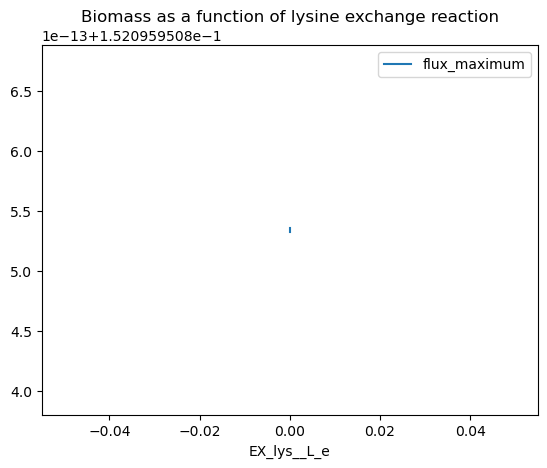

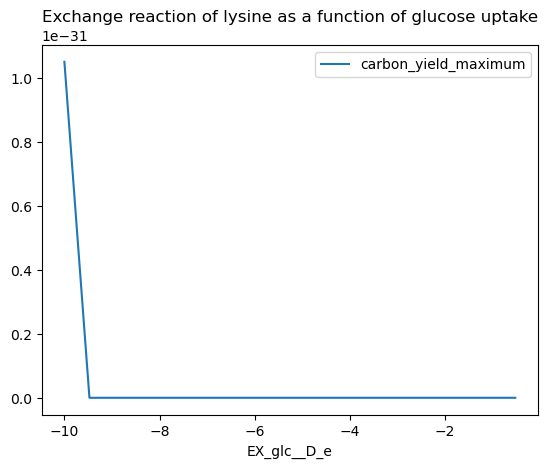

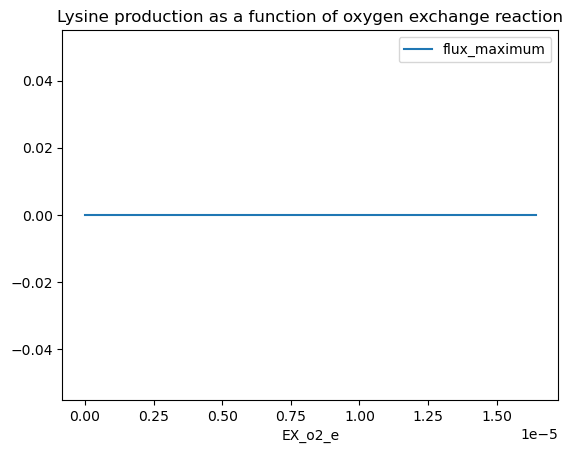

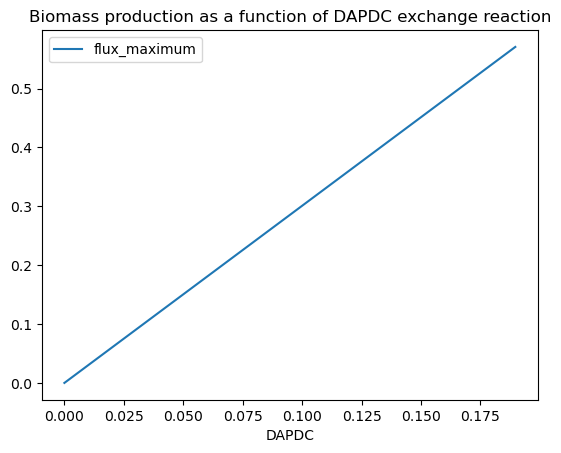

In [90]:
medium2 = model2.medium
with model:
    model2.medium = medium2
    model2.objective = model2.reactions.EX_lys__L_e
    lys_production = model2.optimize().objective_value
    ppp_BIOMASS = production_envelope(model2,
                    reactions=[model2.reactions.EX_lys__L_e],
                    objective=model2.reactions.Growth)
    ppp_LYS = production_envelope(model2,
                    reactions=[model2.reactions.EX_glc__D_e],
                    objective=model2.reactions.EX_lys__L_e)
    ppp_o2 = production_envelope(model2,
                    reactions=[model2.reactions.EX_o2_e],
                    objective=model2.reactions.EX_lys__L_e)

    ppp_BIOMASS.plot(x='EX_lys__L_e', y='flux_maximum', title = 'Biomass as a function of lysine exchange reaction' ) #carbon yield of biomass as function of glucose uptake
    ppp_LYS.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'Exchange reaction of lysine as a function of glucose uptake') #carbon yield of lysine as function of glucose uptake
    ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'Lysine production as a function of oxygen exchange reaction')
    ppp20.plot(x='DAPDC', y='flux_maximum', title = 'Biomass production as a function of DAPDC exchange reaction')

In the first figure we observe that there is no production of lysine with a constant biomass.

In the second figure we see that lysine drops to 0 when the glucose exchange reaction increase.

In the third figure we see that there is no lysine at any range of oxygen.

In the fourth figure there a correlation between biomass production and DAPDC production. The more carbon goes to DAPDC production, the more goes to biomass.

### Anaerobic conditions

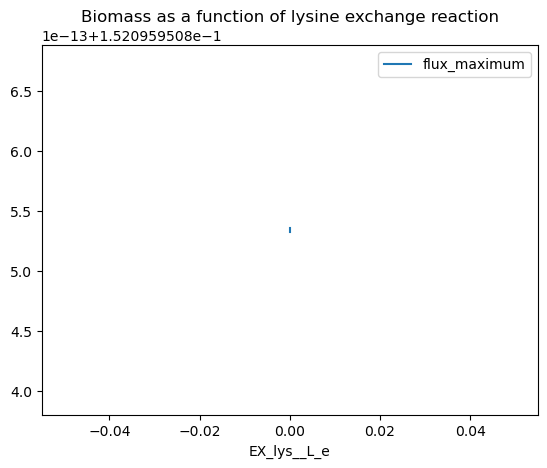

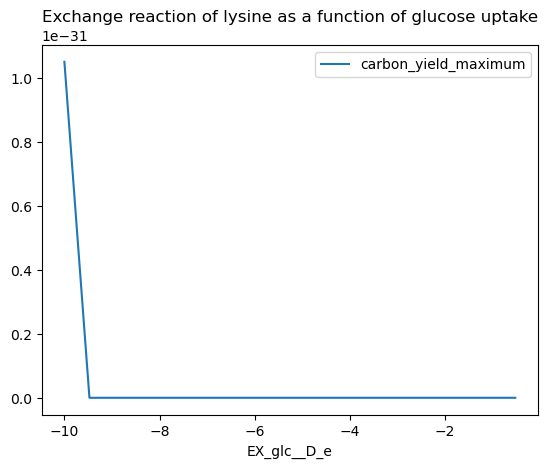

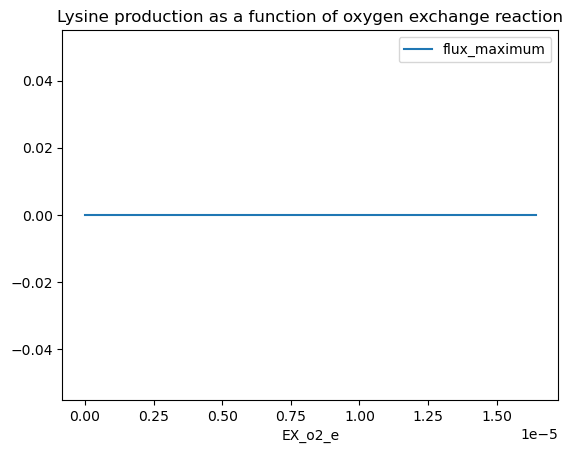

In [93]:
medium2 = model2.medium
with model:
    medium2['EX_o2_e'] = 0
    model2.medium = medium2
    model2.objective = model2.reactions.EX_lys__L_e
    lys_production = model2.optimize().objective_value
    ppp_BIOMASS = production_envelope(model2,
                    reactions=[model2.reactions.EX_lys__L_e],
                    objective=model2.reactions.Growth)
    ppp_LYS = production_envelope(model2,
                    reactions=[model2.reactions.EX_glc__D_e],
                    objective=model2.reactions.EX_lys__L_e)
    ppp_o2 = production_envelope(model2,
                    reactions=[model2.reactions.EX_o2_e],
                    objective=model2.reactions.EX_lys__L_e)

    ppp_BIOMASS.plot(x='EX_lys__L_e', y='flux_maximum', title = 'Biomass as a function of lysine exchange reaction' ) #carbon yield of biomass as function of glucose uptake
    ppp_LYS.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'Exchange reaction of lysine as a function of glucose uptake') #carbon yield of lysine as function of glucose uptake
    ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'Lysine production as a function of oxygen exchange reaction')

In the first figure we observe that there is no production of lysine with a constant biomass.

In the second figure we see that lysine drops to 0 when the glucose exchange reaction increase.

In the third figure we see that there is no lysine at any range, which fits the anaerobic conditions to produce lysine.

## Analysis

The model iCGB21FR doesn’t have a Secretion system to export lysine outside of the cell, but this last one presented a better quality and details compared to the other model. Will be necesary to add a export reactionof lysine into iCGB21FR. 